## Exercise 4.01: Data Staging and visualization

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
mall0 = pd.read_csv("Mall_Customers.csv")
mall0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Renaming columns

In [3]:
mall0.rename({'Annual Income (k$)':'Income', 
              'Spending Score (1-100)':'Spend_score'}, 
             axis=1, inplace=True)
mall0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Visualize the data using a scatterplot

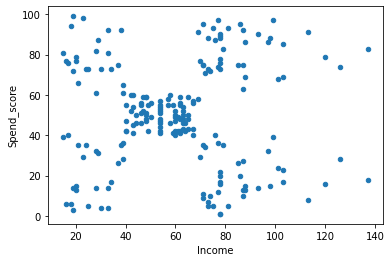

In [4]:
mall0.plot.scatter(x='Income', y='Spend_score')
plt.show()

## Exercise 4.02: Choosing the Number of Clusters Based on Visual Inspection

#### Standardizing the data

In [5]:
mall_scaled = mall0.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

#### K means clustering - varying number of clusters

In [6]:
from sklearn.cluster import KMeans

In [7]:
cluster_cols = ['Income', 'Spend_score']

In [8]:
markers = ['x', '*', '.', '|', '_', '1', '2']

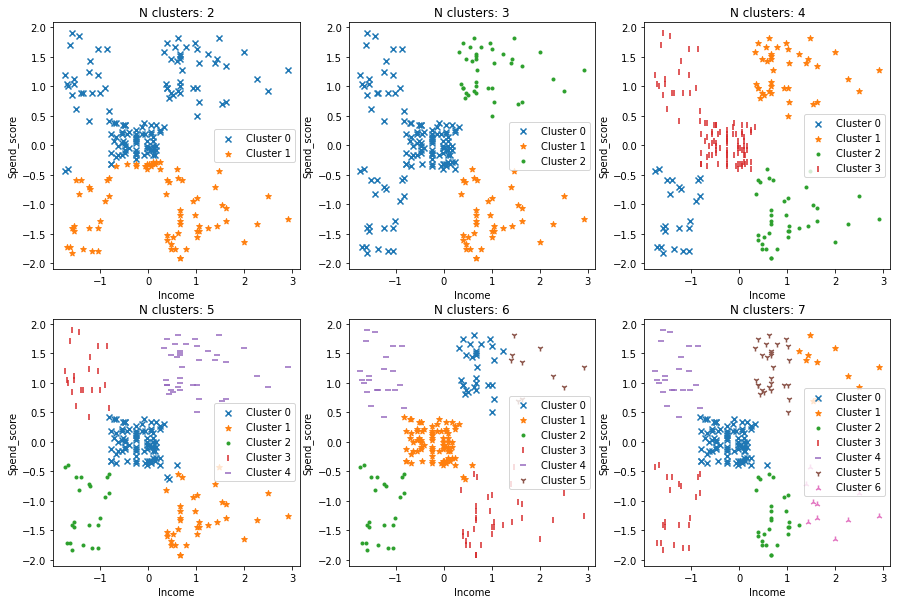

In [9]:
plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    mall_scaled['Cluster']= model.fit_predict(mall_scaled[cluster_cols])
    
    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = mall_scaled[mall_scaled.Cluster == clust]
        plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust], label="Cluster "+str(clust))
        plt.title("N clusters: "+str(n))
        plt.xlabel('Income')
        plt.ylabel('Spend_score')
        plt.legend()

plt.show()

## Exercise 4.03: Determining the Number of Clusters Using the Elbow Method

In [10]:
K = 3

In [11]:
model = KMeans(n_clusters=K, random_state=42)
model.fit(mall_scaled[cluster_cols])

KMeans(n_clusters=3, random_state=42)

In [12]:
print(model.inertia_)

157.70400815035939


In [13]:
X = mall_scaled[cluster_cols]

In [14]:
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)

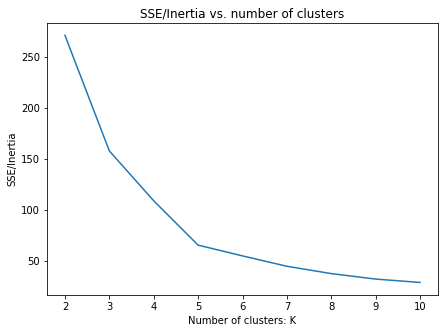

In [15]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores)
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

## Exercise 4.04: Mean-Shift Clustering on mall customers

In [16]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [17]:
bandwidth = 0.9

In [18]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])

mall_scaled['Cluster']= ms.predict(X)

#### Visualize the clusters obtained.

In [19]:
markers = ['x', '*', '.', '|', '_', '1', '2']

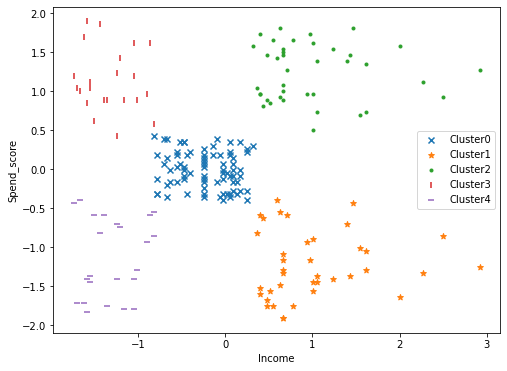

In [20]:
plt.figure(figsize=[8,6])

for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust], label="Cluster"+str(clust))
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

#### Estimating bandwidth using quantiling

In [21]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.1)
print(bandwidth)

0.6487582521320147


In [22]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])

In [23]:
mall_scaled.Cluster.nunique()

7

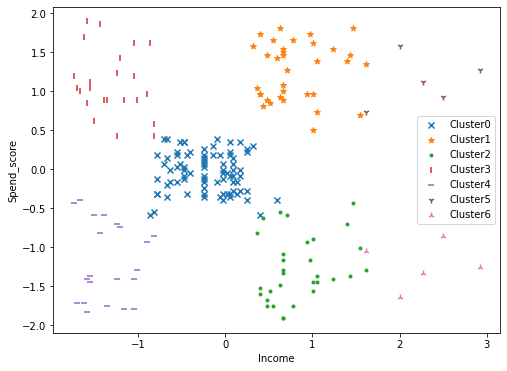

In [24]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust], label="Cluster"+str(clust))
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

#### Using a different value of quantile

In [25]:
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.15)
print(bandwidth)

0.8582301835333547


In [26]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(mall_scaled[cluster_cols])
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])
mall_scaled.Cluster.nunique()

5

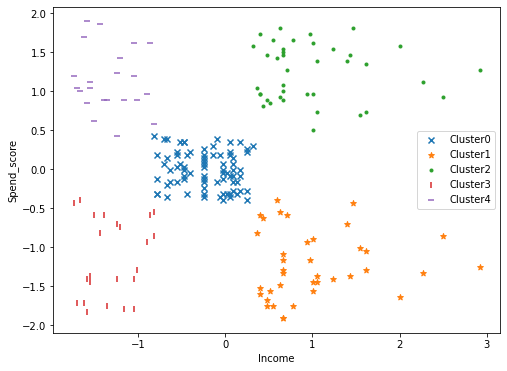

In [27]:
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust], label="Cluster"+str(clust))
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

## Exercise 4.05: Clustering Data Using the k-prototypes Method

In [28]:
import pandas as pd
bank0 = pd.read_csv("Bank_Personal_Loan_Modelling-2.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
bank_scaled = bank0.copy()
bank_scaled['Income'] = scaler.fit_transform(bank0[['Income']])

Applying k-prototypes

In [31]:
from kmodes.kprototypes import KPrototypes

In [32]:
cluster_cols = ['Income', 'Education'] 

In [33]:
X = bank_scaled[cluster_cols].values

In [34]:
kp = KPrototypes(n_clusters=3, random_state=42)
bank_scaled['Cluster'] = kp.fit_predict(bank_scaled[cluster_cols], categorical=[1])

Wall time: 58.7 s


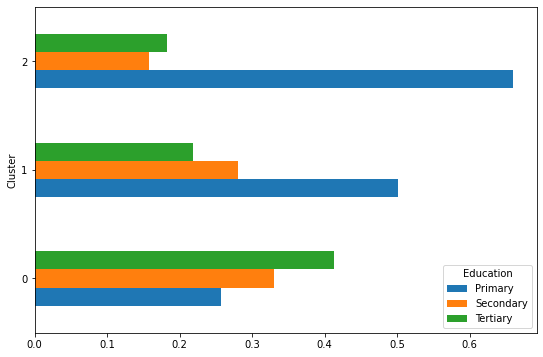

In [35]:
res = bank_scaled.groupby('Cluster')['Education'].value_counts(normalize=True)
res.unstack().plot.barh(figsize=[9,6])
plt.show()

## Exercise 4.06: Using Silhouette Score to Pick Optimal Number of Clusters

In [42]:
cluster_cols = ['Income', 'Spend_score']
X = mall_scaled[cluster_cols]

In [43]:
model = KMeans(n_clusters=3, random_state=42)
cluster_assignments = model.fit_predict(X)

In [44]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

0.46658474419000145


In [45]:
silhouette_scores = []

for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

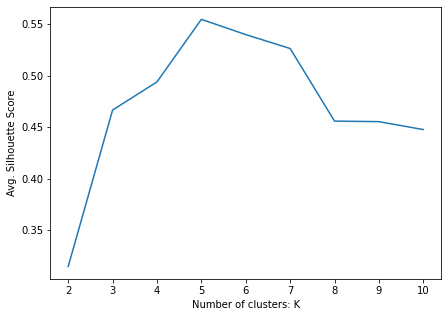

In [46]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores)
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

## Exercise 4.07: Using a Train-Test Split to Evaluate Clustering Performance

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df_train, df_test = train_test_split(mall0, train_size=0.75, random_state=42)

In [52]:
print(df_train.shape)
print(df_test.shape)

(150, 5)
(50, 5)


In [54]:
df_train[cluster_cols] = scaler.fit_transform(df_train[cluster_cols])

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [55]:
df_test[cluster_cols] = scaler.transform(df_test[cluster_cols])

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


#### K means on the train data with 6 clusters

In [56]:
model = KMeans(n_clusters=6, random_state=42)
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score(df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

0.5442206120542766


C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score(df_test[cluster_cols],df_test['Cluster'])
print(silhouette_avg)

0.49515414740736674


C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


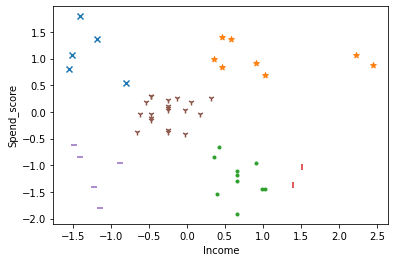

In [58]:
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()